## The heatmap shows:
- that the scores of different platforms are highly correlated with each other.
- that rewards are correlating with the scores, but not that much.
- that the hidden Gem score negativly correlates with rewards nominated.
- that the number of votes negativly correlates with hidden Gem score. 

## The scatter plot shows:
- that the negative correlation number of votes and hidden Gem score is because movies with higher hidden Gem score are less likely to be exist on voting platforms

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file
file_path = './archive/netflix-rotten-tomatoes-metacritic-imdb.csv'
data = pd.read_csv(file_path)



In [2]:
# Display the first few rows of the dataframe to understand its structure
print(data.head())



                 Title                                   Genre  \
0     Lets Fight Ghost  Crime, Drama, Fantasy, Horror, Romance   
1  HOW TO BUILD A GIRL                                  Comedy   
2           Centigrade                         Drama, Thriller   
3                ANNE+                                   Drama   
4                Moxie                 Animation, Short, Drama   

                                                Tags         Languages  \
0  Comedy Programmes,Romantic TV Comedies,Horror ...  Swedish, Spanish   
1       Dramas,Comedies,Films Based on Books,British           English   
2                                          Thrillers           English   
3        TV Dramas,Romantic TV Dramas,Dutch TV Shows           Turkish   
4  Social Issue Dramas,Teen Movies,Dramas,Comedie...           English   

  Series or Movie  Hidden Gem Score  \
0          Series               4.3   
1           Movie               7.0   
2           Movie               6.4   
3 

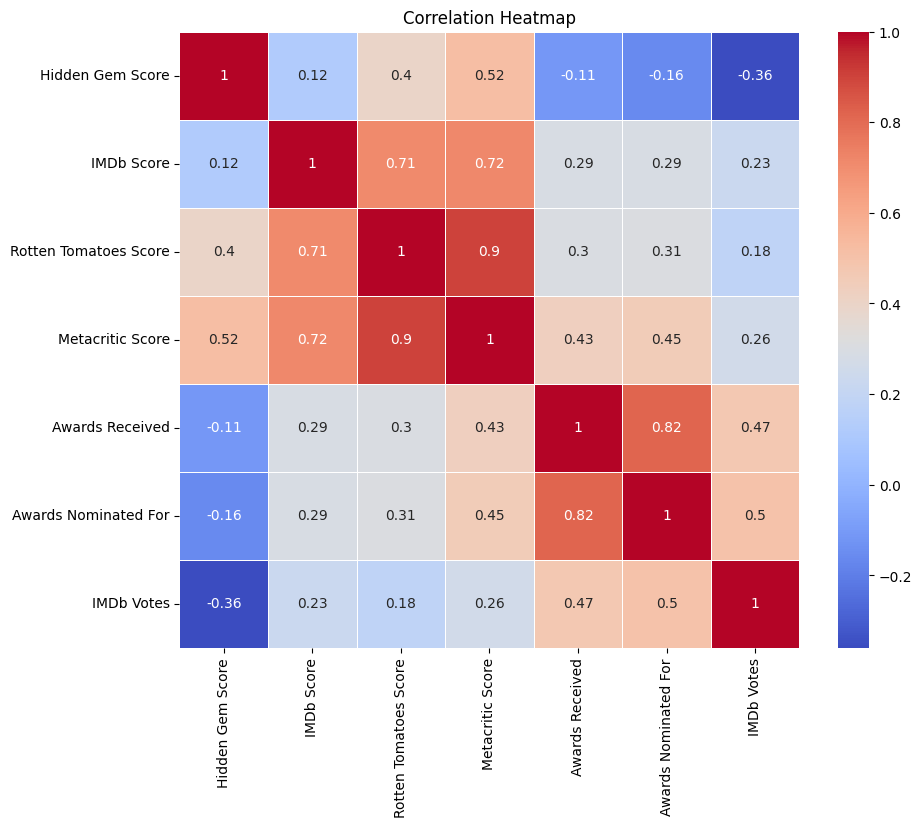

In [3]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Create a correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()




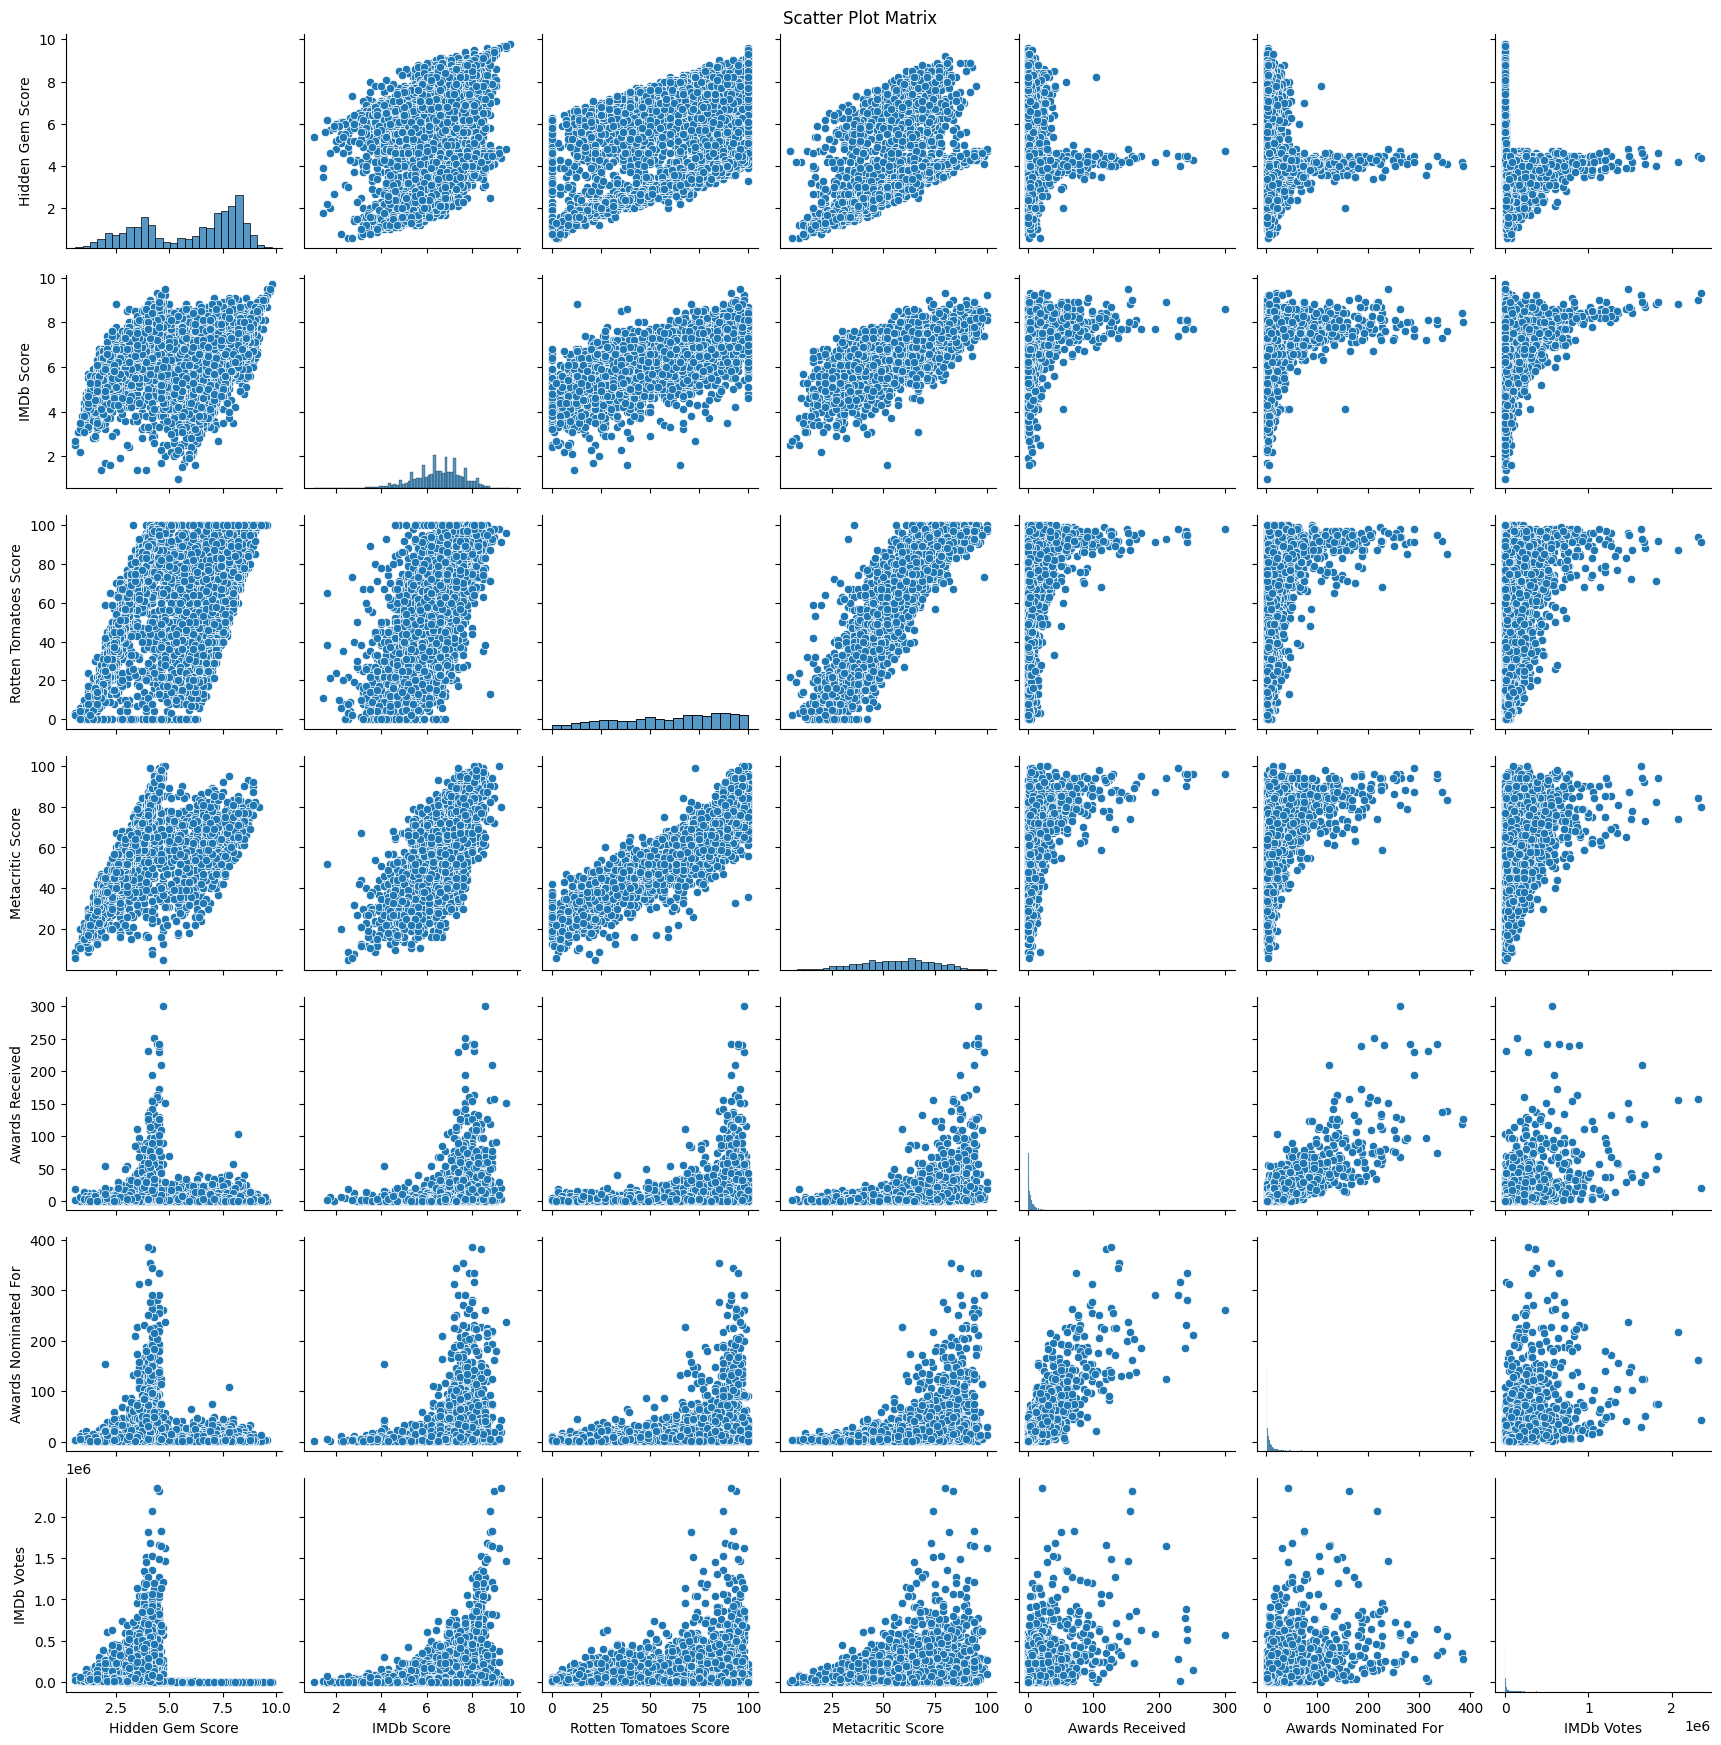

In [4]:
# Create a scatter plot matrix
sns.pairplot(numeric_data)
plt.suptitle('Scatter Plot Matrix', y=1)
plt.show()

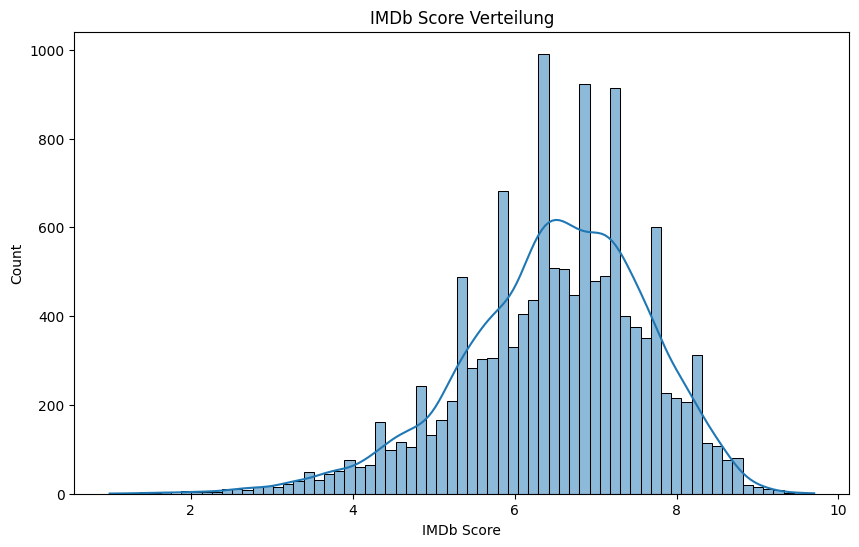

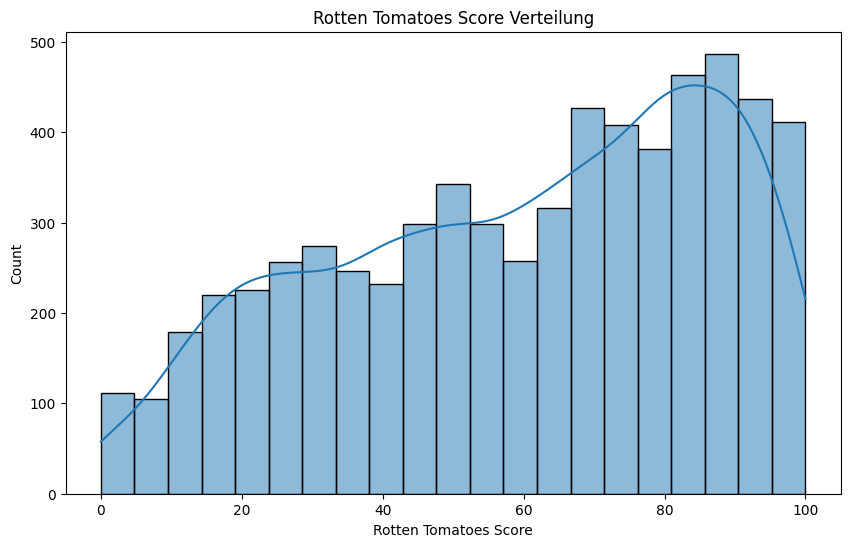

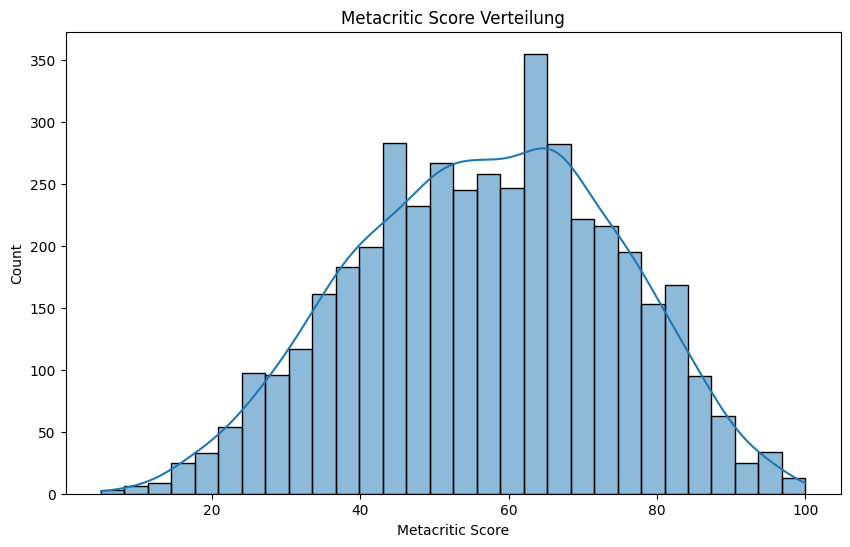

In [9]:
# IMDb Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=numeric_data['IMDb Score'].dropna(), kde=True)
plt.title('IMDb Score Verteilung')
plt.xlabel('IMDb Score')
plt.show()

# Rotten Tomatoes Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=numeric_data['Rotten Tomatoes Score'].dropna(), kde=True)
plt.title('Rotten Tomatoes Score Verteilung')
plt.xlabel('Rotten Tomatoes Score')
plt.show()

# Metacritic Score distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=numeric_data['Metacritic Score'].dropna(), kde=True)
plt.title('Metacritic Score Verteilung')
plt.xlabel('Metacritic Score')
plt.show()

In [25]:
# Define the mapping dictionary for view ratings to minimum age
data['View Rating'] = data['View Rating'].fillna('Unrated')
view_rating_to_age = {
    'G': 0,
    'E10+': 10,
    'TV-Y7-FV': 7,
    'PG': 10,
    'PG-13': 13,
    'R': 17,
    'NC-17': 17,
    'MA-17': 17,
    'Approved': 0,
    'Passed': 0,
    'Unrated': 0,
    'UNRATED': 0,
    'E': 0,
    'Not Rated': 0,
    'NOTRATED': 0,
    'NOT RATED': 0,
    'TV-Y': 0,
    'TV-Y7': 7,
    'TV-G': 0,
    'AL': 0,
    'GP': 0,
    'TV-PG': 10,
    'TV-14': 14,
    'M/PG': 15,
    '15': 15,
    'U': 0,
    'M': 15,
    'TV-MA': 17,
    'X': 18,
    'TV-13': 13,
}

# Convert 'View Rating' to minimum age
data['Minimum Age'] = data['View Rating'].replace(view_rating_to_age)
df = data.drop('View Rating', axis=1)


C:\Users\jakob\AppData\Local\Temp\ipykernel_11452\2174180819.py:37: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Minimum Age'] = data['View Rating'].replace(view_rating_to_age)


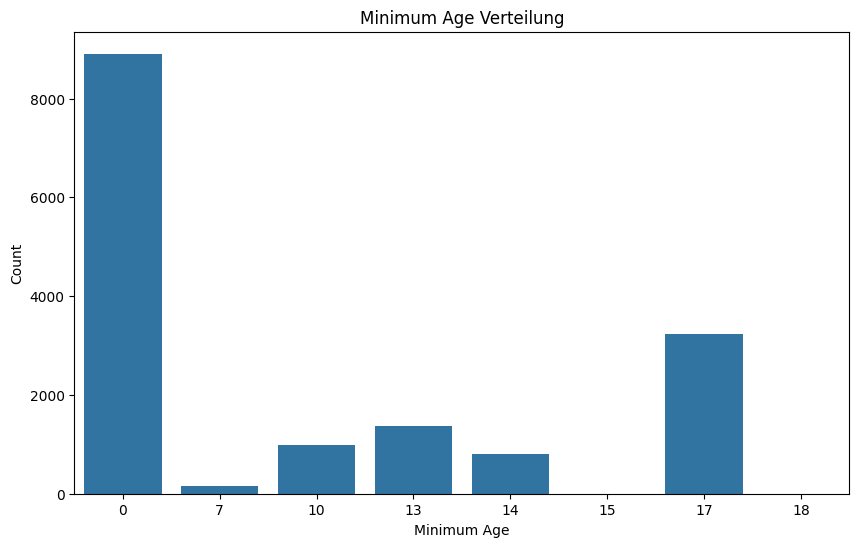

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Minimum Age')
plt.title('Minimum Age Verteilung')
plt.xlabel('Minimum Age')
plt.ylabel('Count')
plt.show()